# Homework 8
PSY4219/6129 Fall 2022

**Due November 9 in class**

**18 points**

You can do this assignment in a Python .py file or in a Jupyter Notebook. 
Recall that if you run into problems with code in a Jupyter Notebook, the best 
thing would be to try to debug that code in PyCharm (even if you want to copy 
it back to a Jupyter Notebook). 

*Unexcused late assignments will be penalized 10% for every 24 hours late, 
starting from the time class ends, for a maximum of two days, after which they 
will earn a 0.*

In [1]:
import numpy as np
import scipy
from PIL import Image
from IPython.display import display
import random
from scipy import signal
import matplotlib.pyplot as plt

***
## Q1
For this question, perform some basic operations on an image that I have loaded 
onto Brightspace (`nashville.jpg`).

### (a) (2 points)
Read in `nashville.jpg`, display it, and convert it from RGB to grayscale using 
the following formula to convert from red, green, and blue values to grayscale 
intensity:

`intensity = 0.2989 * red + 0.5870 * green + 0.1140 * blue`

Save the image as a jpg file called nashvillegray.jpg, read it back in, and display it. You will use this grayscale version in the remaining parts below.




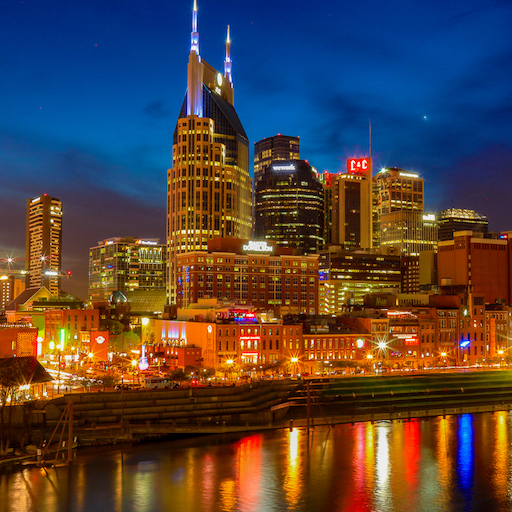

In [2]:
# TODO: Load nashville.jpg and display it
im = Image.open('nashville.jpeg')
display(im)

In [3]:
# TODO: Convert the image to grayscale and save it as nashvillegray.jpg
imdata = np.asarray(im)
imdata2 = np.uint8(imdata[:, :, 0] * 0.2989 + imdata[:, :, 1] * 0.5870 + imdata[:, :, 2] * 0.1140)
im2 = Image.fromarray(imdata2)
im2.save('nashvillegray.jpg', format='JPEG')

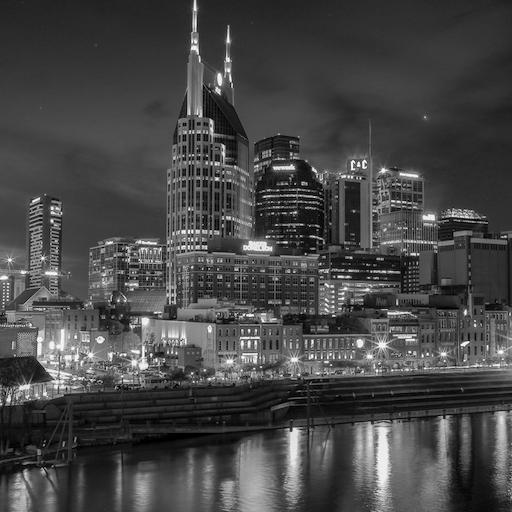

In [4]:
# TODO: Load nashvillegray.jpg and display it
im3 = Image.open('nashvillegray.jpg')
imdata3 = np.asarray(im3)
display(im3)

### (b) (5 points)
Create a scrambled version of the grayscale image `nashvillegray.jpg`. Imagine 
dividing the image into an 8x8 grid. Create a scrambled version of the image 
where each of the sections in the 8x8 grid is randomly shuffled (a 
permutation). An example of the grayscale version and one possible scrambled 
version is shown below. We discussed a way to accomplish this scrambling in 
class.

![Q1b](https://i.imgur.com/WJah3z3.png)

Your code should read in an image from a file (in this case nashvillegray.jpg) 
into a numpy array. Create a function that takes this numpy array as an 
argument and takes the number of ways to slice the image (for example 8 to 
create an 8x8 grid) and returns a numpy array containing the scrambled image. 
Your code should display the scrambled image. Aside from using a built in 
permutation function and other non-image-processing functions in Python, the 
scrambling of the image should be done by your code (in other words, do not 
search for any built-in image/signal processing functions or existing packages 
that might do this scrambling for). Please try to write your code so that you 
can change the “8” in the 8x8 grid to some other value, like a 4x4 grid, or a 
64x64 grid; you can assume that the number is chosen to equally divide the 
image size. Save the resulting scrambled image to a jpg file

In [5]:
def scramble_image(img: np.ndarray, grid_size: int = 8) -> np.ndarray:
    """
    This function read in a numpy array of an image and returns a numpy array containing the scrambled image.
    the lst list stores shuffled coordinates of the original numpy array and the scra numpy array are filled
    with the according grid of the original img array.
    """
    sli = int(img.shape[0] / grid_size)
    lst = []
    for i in range(grid_size):
        for j in range(grid_size):
            lst.append([int(i * sli), int(j * sli)])
    random.shuffle(lst)
    scra = np.zeros_like(img)
    
    n = 0
    for i in range(grid_size):
        for j in range(grid_size):
            scra[i * sli: (i + 1) * sli,
                 j * sli: (j + 1) * sli] = img[lst[n][0]: lst[n][0] + sli, lst[n][1]: lst[n][1] + sli]
            n += 1
    return scra

In [6]:
imdata4 = scramble_image(imdata3, 8)

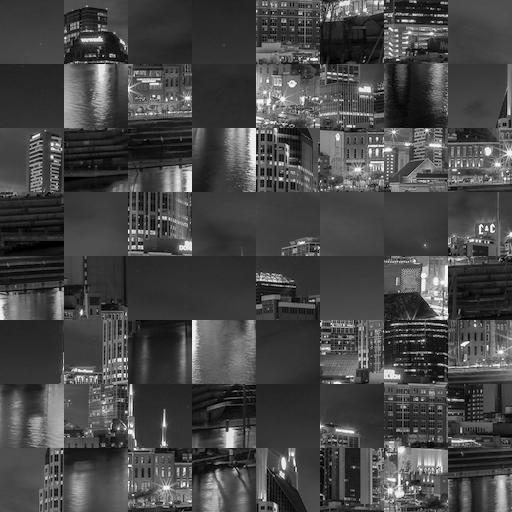

In [7]:
im4 = Image.fromarray(imdata4)
im4.save('nashvillescramble.jpg', format='JPEG')
display(im4)

### (b) (2 points)
Add “noise” to an image (in this case `nashvillegray.jpg`). Your code should 
read in an image from a file into a numpy array, that numpy array should be 
passed to a function that adds the noise, with the noise specified by other 
arguments passed to the function.

The noise should be normally distributed with mean $\mu = 0$ and standard 
deviation $\sigma$. This “noise” is added to the intensity (brightness) of each 
pixel in the image. This kind of noise is what sometimes called “salt and 
pepper noise”, whereby the intensity of each image pixel is jiggled up or down 
by a normally distributed random number. 

Create one image and save it with a low but perceptible level of noise. Create 
another image and save it with a relatively high level of noise.

When you add noise, allow for two options (as an optional argument in your 
function): one where noise that would go above 255 is capped at 255 and that 
would go below 0 is capped at 0, and another where noise is allowed to jump 
from 255 to 0 or from 0 to 255 when you cast as an `uint8`. Your code should 
show what happens (displaying two images) to illustrate the two ways of 
manipulating noise (and capping vs. rolling over at the extremes).

Your function should return a numpy array with `uint8` values.

For each version, create one image and save it with a low but perceptible level 
of noise and create another image and save it with a relatively high level of 
noise; you will be saving four images.

In [8]:
def add_noise(
    img: np.ndarray, sigma: float, cap_values: bool = True
) -> np.ndarray:
    """
    This function read in a numpy array form of an image and adds noise to it,
    it returns the noisy version of the image in a numpy array.
    """
    noise = np.random.normal(0, sigma, img.shape[0] * img.shape[1]).reshape(img.shape[0], img.shape[1])
    while cap_values:
        imgf = np.float64(img)
        imgf += noise
        imgf[imgf > 255] = 255
        imgf[imgf < 0] = 0
        img1 = np.uint8(imgf)
        return img1
    else:
        img2f = np.float64(img)
        img2f += noise
        img2 = np.uint8(img2f)
        return img2

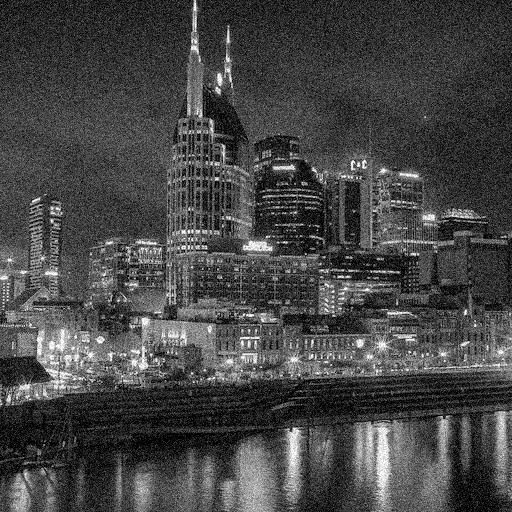

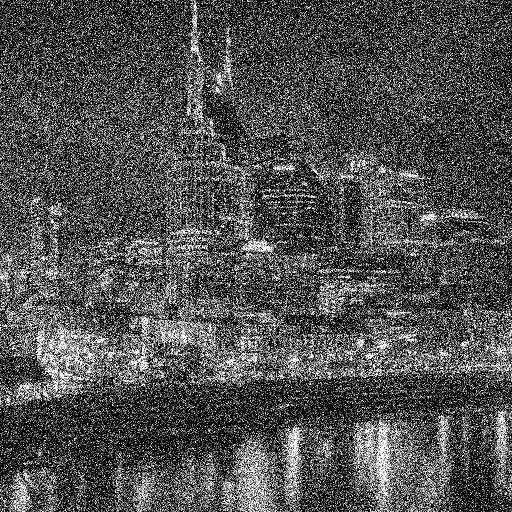

In [9]:
# TODO: Create images with high and low noise using capping value method and save them
cap_low = add_noise(imdata3, 20, True)
imcaplow = Image.fromarray(cap_low)

cap_high = add_noise(imdata3, 80, True)
imcaphigh = Image.fromarray(cap_high)

imcaplow.save('nashvillecaplow.jpg', format='JPEG')
imcaphigh.save('nashvillecaphigh.jpg', format='JPEG')
display(imcaplow)
display(imcaphigh)

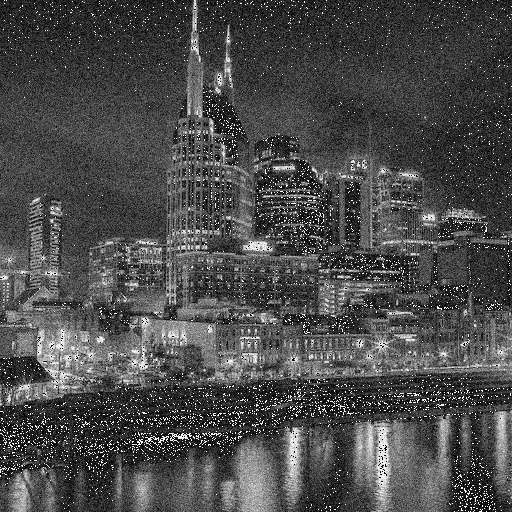

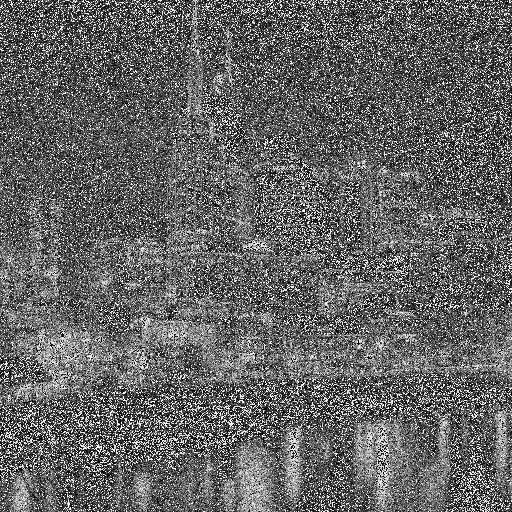

In [10]:
# TODO: Create images with high and low noise using capping value method and save themShow the difference between capping values vs. rolling over and save them
roll_low = add_noise(imdata3, 20, False)
imrolllow = Image.fromarray(roll_low)

roll_high = add_noise(imdata3, 50, False)
imrollhigh = Image.fromarray(roll_high)

imrolllow.save('nashvillerolllow.jpg', format='JPEG')
imrollhigh.save('nashvillerollhigh.jpg', format='JPEG')

display(imrolllow)
display(imrollhigh)

## Q2
We talked about using the Laplacian of Gaussians filter to find edges in 
images. For this question, I would like you to explore the Laplacian, the 
Gaussian, and the Laplacian of Gaussians (LoG). This question uses the 
convolution computations we talked about in class and illustrated in the posted 
Jupyter Notebooks from class. 

For this assignment, read in and use `nashvillegray.jpg` from above, but your 
code should work for any image that is read in.

Use this Laplacian filter:

In [11]:
L = np.array([[0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0, -1, -1, -1, -1, -1,  0,  0],
              [0,  0, -1, -1, -1, -1, -1,  0,  0],
              [0,  0, -1, -1, 24, -1, -1,  0,  0],
              [0,  0, -1, -1, -1, -1, -1,  0,  0],
              [0,  0, -1, -1, -1, -1, -1,  0,  0],
              [0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0,  0,  0,  0,  0,  0,  0,  0]])

Use this Gaussian filter:

In [12]:
G = np.array([[0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0,  1,  4,  7,  4,  1,  0,  0],
              [0,  0,  4, 16, 26, 16,  4,  0,  0],
              [0,  0,  7, 26, 41, 26,  7,  0,  0],
              [0,  0,  4, 16, 26, 16,  4,  0,  0],
              [0,  0,  1,  4,  7,  4,  1,  0,  0],
              [0,  0,  0,  0,  0,  0,  0,  0,  0],
              [0,  0,  0,  0,  0,  0,  0,  0,  0]])/273

Note that this Gaussian filter is larger than some of the examples shown in 
class (and in the Jupyter notebook) because here we are using a higher-
resolution image. Using a 3x3 Gaussian would produce nearly-imperceptible blur.

### (a) (2 points)
Confirm (in code) that convolution is commutative, using the Laplacian and 
Gaussian filters, within a reasonable small epsilon < .000001. Use the epsilon 
value in some way to support your demonstration (in other words, do not simply 
print out the resulting convolutions to inspect by eye – show it somehow).

In [13]:
# TODO: Confirm that convolution is commutative
epsilon = 0.000001

convolution1 = signal.convolve2d(L, G, mode="same")
convolution2 = signal.convolve2d(G, L, mode="same")

dif = np.sum(convolution1 - convolution2)
print(dif)

if dif < epsilon:
    print("Convolution is commutative.")

0.0
Convolution is commutative.


### (b) (3 points)
Confirm that you understand the computations that underlie convolution. Pick a 
single pixel location `(i,j)` somewhere in the grayscale image of the Nashville 
skyline (`nashvillegray.jpg`) that is sufficiently far away from the edges of 
the image to avoid dealing with edge effects. First, calculate the convolution 
of the Laplacian with the image at this pixel location without using the 
`signal.convolve2d()` function, i.e., just following the equations for 
computing the convolution at a particular pixel location `(i,j)`. Confirm that 
the value you get with your “hand-coded” convolution calculation matches that 
using the built-in `signal.convolve2d` function at the same pixel location 
`(i,j)` within some epsilon.

Note that your code will need to work with other filters (not just the 
Laplacian) so make sure it’s general (not hard-coded). Recall that the 
convolution requires a particular way of doing its calculations that makes it 
different from a cross-correlation; don’t just rely on getting the same answer 
for your code and the `signal.convolve2d` function; make sure your code does 
the correct calculations. 

In [14]:
def convolve_location(
    img: np.ndarray, 
    filter: np.ndarray, 
    location: tuple
) -> float:
    """
    This function returns the convolution of a single pixel location.
    """
    s0 = filter.shape[0] // 2
    s1 = filter.shape[1] // 2
    loc0 = location[0]
    loc1 = location[1]
    conv = np.sum(img[loc0 - s0: loc0 + s0 + 1, loc1 - s1: loc1 + s1 + 1] * filter)
    return conv

In [15]:
# TODO: Show that your function works the same as signal.convolve2d
pt = (80, 50)
fct = convolve_location(imdata3, L, pt)
builtin = signal.convolve2d(imdata3, L, mode="same")[pt[0], pt[1]]
dif = fct - builtin
print(dif)
epsilon = 0.001
if dif < epsilon:
    print("Hand-coded convolution calculation matches that using the built-in signal.convolve2d function")

0
Hand-coded convolution calculation matches that using the built-in signal.convolve2d function


### (c) (1 point)
Create a new filter, called `LoG`, which is the convolution of the Laplacian 
with the Gaussian. I do not want you to use the LoG filter I defined in class, 
but create one by actually convolving the Laplacian with the Gaussian (above) 
in code. You can use signal.convolve2d() function for this.

In [16]:
# TODO: Create the new filter LoG
LoG = signal.convolve2d(L, G, mode='same')
LoG

array([[-0.003663  , -0.01831502, -0.04395604, -0.05860806, -0.06227106,
        -0.05860806, -0.04395604, -0.01831502, -0.003663  ],
       [-0.01831502, -0.09157509, -0.21245421, -0.28571429, -0.3040293 ,
        -0.28571429, -0.21245421, -0.09157509, -0.01831502],
       [-0.04395604, -0.21245421, -0.39194139, -0.28571429, -0.05494505,
        -0.28571429, -0.39194139, -0.21245421, -0.04395604],
       [-0.05860806, -0.28571429, -0.28571429,  0.58608059,  1.44322344,
         0.58608059, -0.28571429, -0.28571429, -0.05860806],
       [-0.06227106, -0.3040293 , -0.05494505,  1.44322344,  2.75457875,
         1.44322344, -0.05494505, -0.3040293 , -0.06227106],
       [-0.05860806, -0.28571429, -0.28571429,  0.58608059,  1.44322344,
         0.58608059, -0.28571429, -0.28571429, -0.05860806],
       [-0.04395604, -0.21245421, -0.39194139, -0.28571429, -0.05494505,
        -0.28571429, -0.39194139, -0.21245421, -0.04395604],
       [-0.01831502, -0.09157509, -0.21245421, -0.28571429, -0

### (d) (3 point)
Convolve the image with the Laplacian alone, the Gaussian alone, and the 
Laplacian of Gaussians. You can use the signal.convolve2d() function for this.

Make a 1x4 subplot. Display the original and the results of the convolutions 
using `imshow()`.

Recall that the Laplacian and Laplacian of Gaussians (LoG) produces an “image” 
of second derivatives. That means that it will contain both positive and 
negative values (you can confirm that by looking at the numpy arrays resulting 
from the convolution). You will want to play around with ways to visualize the 
Laplacian and LoG. If you just display it directly, it might be hard to see the 
results of the filtering. For example, you could set a criterion (a step 
function) so that values greater than the criterion are white and those less 
than the criterion are black (recall that the Laplacian detects “edges” in an 
image). Make sure you manipulate the Laplacian and Laplacian of Gaussian images 
the same way.

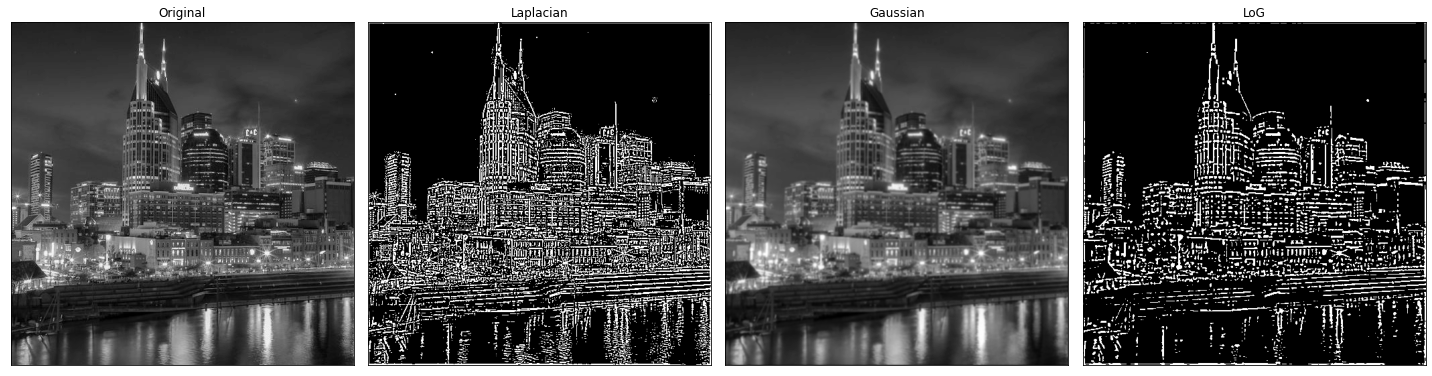

In [17]:
# TODO: Convolve the image with each filter and properly display the results
imgray = Image.open('nashvillegray.jpg')
imdg = np.asarray(imgray)

cri = 130
#apply the Laplacian alone
fim_L = signal.convolve2d(imdg, L, mode='same')
fim_L[fim_L < cri] = 0
fim_L[fim_L > cri] = 255
fimL = Image.fromarray(np.uint8(fim_L))

#apply the Gaussian alone
fim_G = signal.convolve2d(imdg, G, mode='same')
fimG = Image.fromarray(np.uint8(fim_G))

#apply the LoG
fim_LoG = signal.convolve2d(imdg, LoG, mode='same')
fim_LoG[fim_LoG < cri] = 0
fim_LoG[fim_LoG > cri] = 255
fimLoG = Image.fromarray(np.uint8(fim_LoG))

#create a subplot
sz = 20
fig, axs = plt.subplots(nrows=1, ncols=4, tight_layout=True, figsize=(sz, sz))
axs[0].imshow(imgray, cmap = 'gray'); axs[0].set_xticks([]); axs[0].set_yticks([]); axs[0].set_title("Original");
axs[1].imshow(fimL, cmap = 'gray'); axs[1].set_xticks([]); axs[1].set_yticks([]); axs[1].set_title("Laplacian");
axs[2].imshow(fimG, cmap = 'gray'); axs[2].set_xticks([]); axs[2].set_yticks([]); axs[2].set_title("Gaussian");
axs[3].imshow(fimLoG, cmap = 'gray'); axs[3].set_xticks([]); axs[3].set_yticks([]); axs[3].set_title("LoG");